# EDA for loan data

## Exploring data and understand business use cases


#### Step 1 : Importing required libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#### Step 2 : Understanding raw data

In [26]:
df = pd.read_csv("./loan.csv")
df.shape

<ipython-input-26-7e9ddf5fbef1>:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./loan.csv")


(39717, 111)

###### Observation : There are 111 columns and 39717 rows.

In [27]:
null_count = df.isnull().sum()
null_cols= null_count[null_count > 4000].count()
print("There are total of",null_cols,"null Columns")

There are total of 58 null Columns


###### Observation the above found rows have more than 30% approx null values. Apart from desc which is Decription we will drop all other values

In [28]:
df_dropped = df.copy()
df_dropped.dropna(axis=1, thresh=20000, inplace=True)
df_dropped.shape

(39717, 54)

###### We store the dataframe in a new dataframe and drop all columns with excess NA values. We consider keeping 'desc' as it contains description about transactions. After removing waste columns we have 54 columns.

#### We finsihed cleaning of raw data and will be moving into EDA of the dataset

### Step 2 EDA
### 1) Categorical analysis
#### a) Term /Tenure of the loans


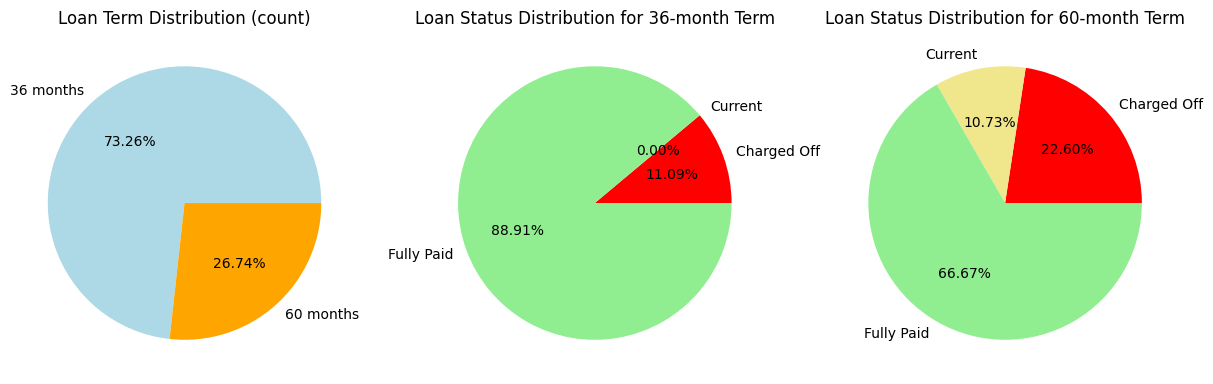

In [29]:
terms = ['36 months','60 months']
status = ['Charged Off', 'Current', 'Fully Paid']

arr = df_dropped.groupby('term').size()
arr = df_dropped.groupby('term').size()

term_36 = df_dropped[df_dropped['term'] == ' 36 months']
term_36_status = term_36.groupby('loan_status').size()
term_36 = term_36_status.values
term_36 = np.insert(term_36, 1, 0)

term_60 = df_dropped[df_dropped['term'] == ' 60 months']
term_60_status = term_60.groupby('loan_status').size()
term_60 = term_60_status.values

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Top pie chart
axes[0].pie(arr, labels=terms, colors=['lightblue', 'orange'], autopct='%1.2f%%')
axes[0].set_title('Loan Term Distribution (count)')

# Bottom left pie chart
axes[1].pie(term_36, labels=status, colors=['red', 'khaki', 'lightgreen'], autopct='%1.2f%%')
axes[1].set_title('Loan Status Distribution for 36-month Term')

# Bottom right pie chart
axes[2].pie(term_60, labels=status, colors=['red', 'khaki', 'lightgreen'], autopct='%1.2f%%')
axes[2].set_title('Loan Status Distribution for 60-month Term')

plt.show()

#### b) Defaults based per Grade of loan

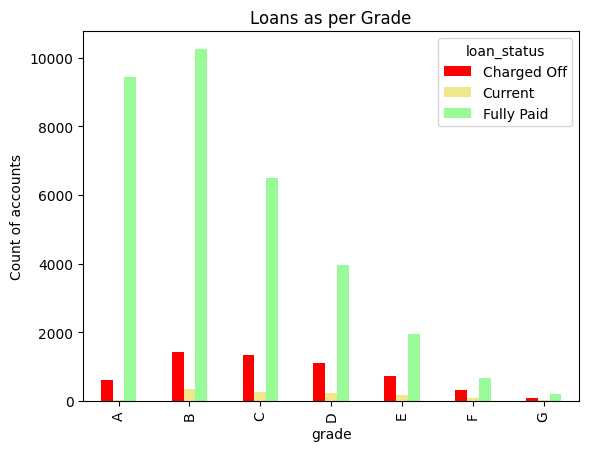

In [30]:
df_loan_status_grade = df_dropped[['loan_status', 'grade']]
df_loan_status_grade.groupby(by=['grade', 'loan_status']).size().unstack().plot(kind='bar',color = ['red','khaki','palegreen'])
plt.ylabel("Count of accounts")
plt.title('Loans as per Grade')
plt.show()


#### c) Defaults based per Sub - Grade of loan

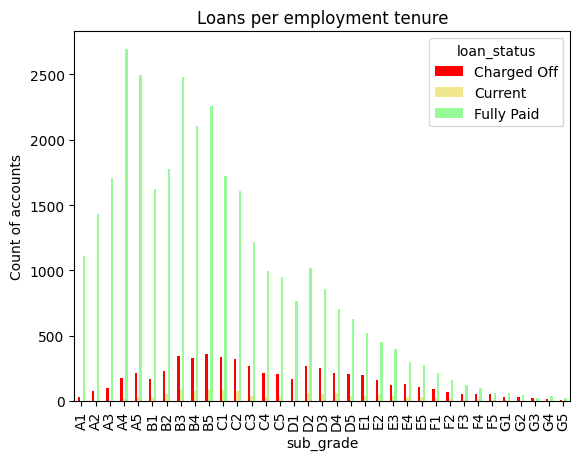

In [31]:
df_loan_status_home = df_dropped[['loan_status', 'sub_grade']]
df_loan_status_home.groupby(by=['sub_grade', 'loan_status']).size().unstack().plot(kind='bar',color = ['red','khaki','palegreen'])
plt.ylabel("Count of accounts")
plt.title('Loans per employment tenure')
plt.show()

#### d) Defaults based per Employment tenure of account

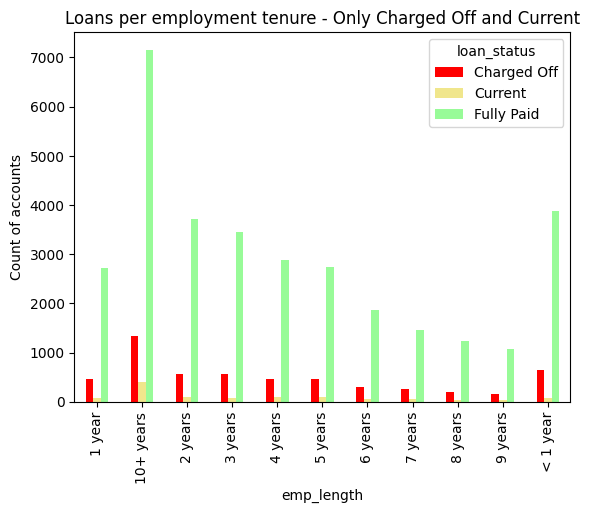

In [32]:
df_loan_status_home = df_dropped[['loan_status', 'emp_length']]

df_loan_status_home.groupby(by=['emp_length', 'loan_status']).size().unstack().plot(kind='bar',color = ['red','khaki','palegreen'])
plt.ylabel("Count of accounts")
plt.title('Loans per employment tenure - Only Charged Off and Current')
plt.show()

#### e) Defaults based per Home onwnership of account

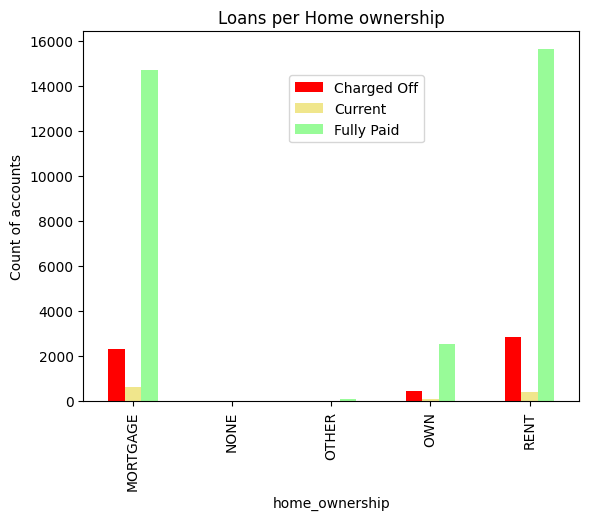

In [33]:
df_loan_status_home = df_dropped[['loan_status', 'home_ownership']]

df_loan_status_home.groupby(by=['home_ownership', 'loan_status']).size().unstack().plot(kind='bar',color = ['red','khaki','palegreen'])
plt.ylabel("Count of accounts")
plt.title('Loans per Home ownership')
plt.legend(bbox_to_anchor =(0.7,0.9))
plt.show()

####  f) Defaults as per Verification of accounts

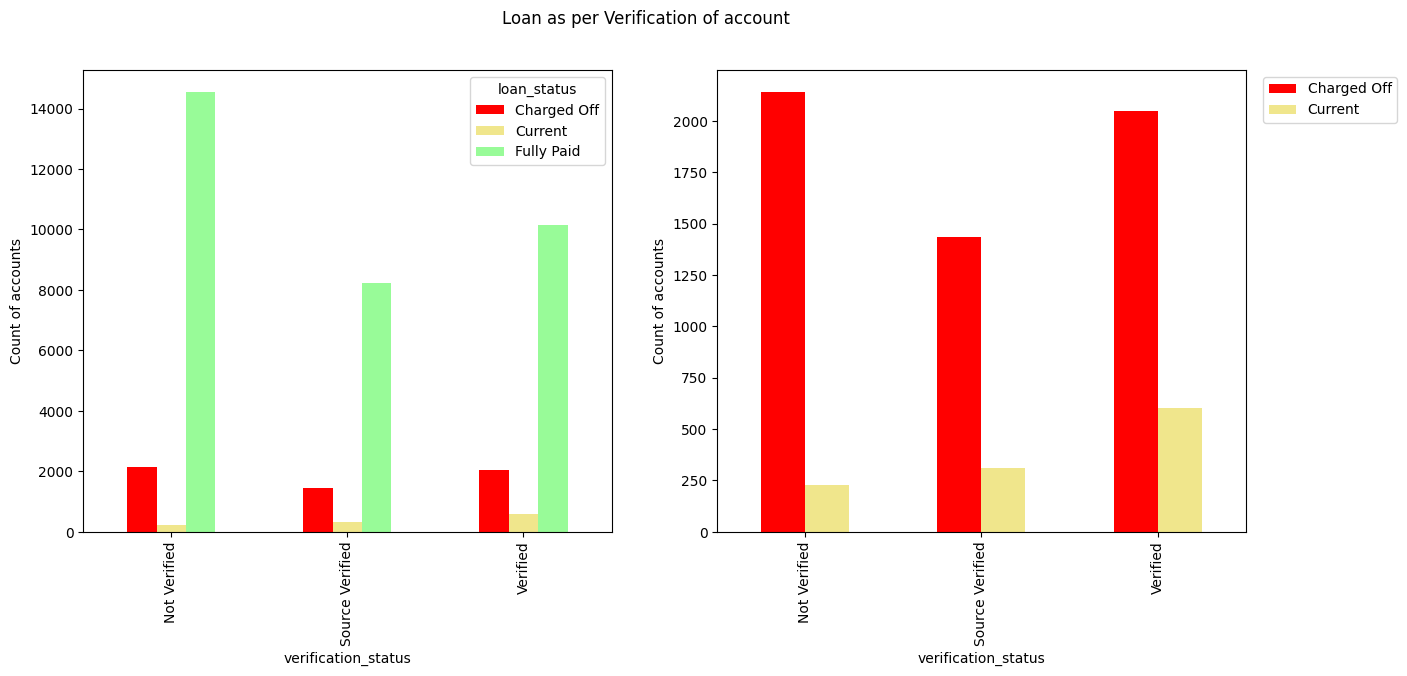

In [34]:
df_loan_status_home = df_dropped[['loan_status', 'verification_status']]
fig, ax = plt.subplots(ncols =2 ,nrows= 1, figsize = (15,6))
df_loan_status_home.groupby(by=['verification_status', 'loan_status']).size().unstack().plot(kind='bar',color = ['red','khaki','palegreen'], ax=ax[0])
ax[0].set_ylabel("Count of accounts")
df_loan_status_home = df_loan_status_home[df_loan_status_home['loan_status']!='Fully Paid']
df_loan_status_home.groupby(by=['verification_status', 'loan_status']).size().unstack().plot(kind='bar',color = ['red','khaki','palegreen'], ax=ax[1])
ax[1].set_ylabel("Count of accounts")
plt.legend(bbox_to_anchor =(1.3 ,1))
fig.suptitle("Loan as per Verification of account")
plt.show()

#### g) Defaults based on PURPOSE OF LOAN

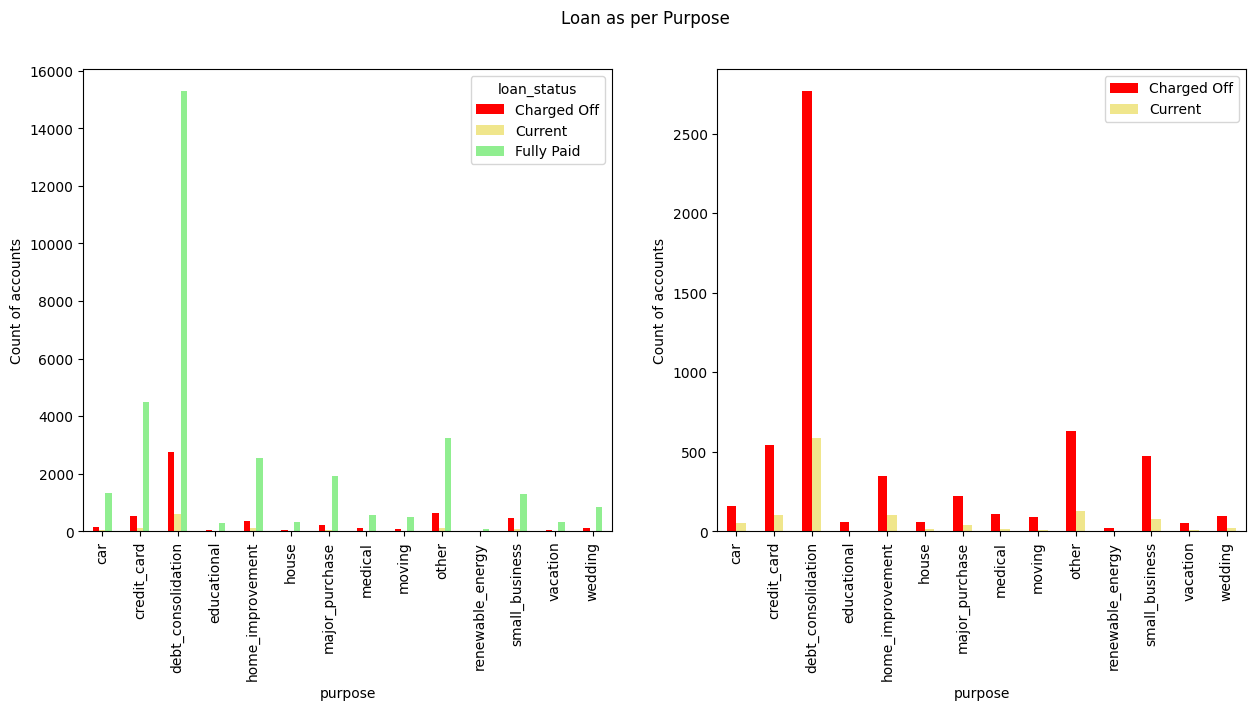

In [35]:
df_loan_status_home = df_dropped[['loan_status', 'purpose']]
cats = df_loan_status_home.groupby(by=['purpose','loan_status']).size().unstack()

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
df_loan_status_home = df_dropped[['loan_status', 'purpose']]

df_loan_status_home.groupby(by=['purpose','loan_status']).size().unstack().plot(kind='bar',color = ['red', 'khaki', 'lightgreen'], ax = ax[0])
ax[0].set_ylabel("Count of accounts")
plt.legend(bbox_to_anchor =(1.3 ,0.4))

df_dropped_paid = df_dropped[df_dropped['loan_status']!= 'Fully Paid']
df_loan_status_home = df_dropped_paid[['loan_status', 'purpose']]

df_loan_status_home.groupby(by=['purpose','loan_status']).size().unstack().plot(kind='bar',color = ['red', 'khaki', 'lightgreen'], ax = ax[1])
ax[1].set_ylabel("Count of accounts")
plt.legend(bbox_to_anchor =(1,1))
fig.suptitle("Loan as per Purpose")
plt.show()


### 1) Numerical analysis
#### a) Loan Amount across accounts

Mean is :  11219.443814991062
Standard deviation is : 7456.670694100865
Median is : 10000.0
Percentile :  [ 5500. 10000. 15000. 22000. 25000. 35000.]


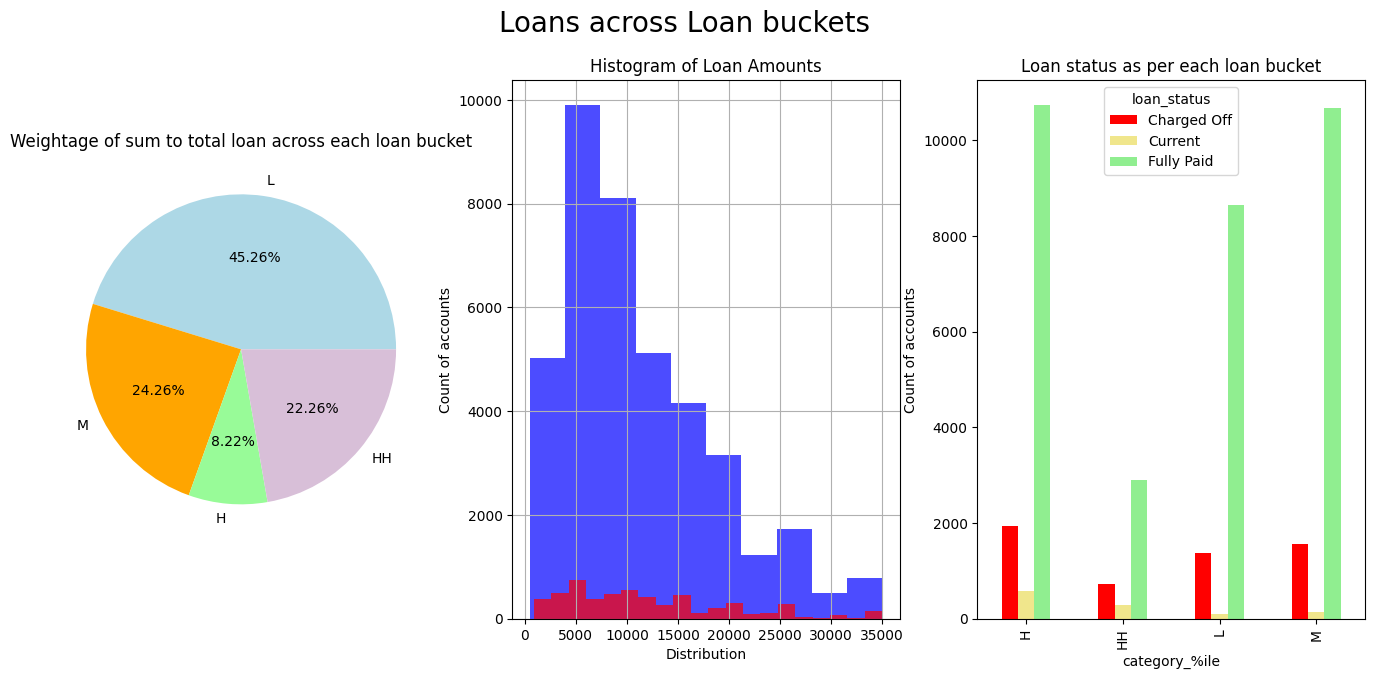

In [36]:
print("Mean is : ",df_dropped['loan_amnt'].mean())
print("Standard deviation is :",df_dropped['loan_amnt'].std())
print("Median is :", df_dropped['loan_amnt'].median())
percentile = np.percentile(df_dropped['loan_amnt'],[25,50,75,90,95,99])
print("Percentile : ",percentile)

# WE CATEGORISE THE CONTINUOUS DATA INTO 4 BUCKTS OF Low, Mid, High and Very High BASED ON THE PERCENTILE VALUES as L,M,H,HH and store in a new coloumn called

df_dropped.loc[df_dropped['loan_amnt'].between(0, 5500, 'both'), 'category_%ile'] = 'L'
df_dropped.loc[df_dropped['loan_amnt'].between(5500, 10000, 'right'), 'category_%ile'] = 'M'
df_dropped.loc[df_dropped['loan_amnt'].between(10000, 22000, 'right'), 'category_%ile'] = 'H'
df_dropped.loc[df['loan_amnt'].between(22000, 35000, 'right'), 'category_%ile'] = 'HH'

# THE DISTRIBUTION OF THE ABOVE

df_loanStats = df_dropped[['loan_amnt', 'category_%ile']]
df_loanStats.groupby(by='category_%ile').sum()
palette_color = sns.color_palette('pastel')

categories = df_dropped['category_%ile'].unique()
category_sum_values = df_loanStats.groupby(by='category_%ile').sum()
arr = category_sum_values['loan_amnt'].values
fig,ax = plt.subplots(ncols = 3, nrows =1 , figsize=(17,7))

ax[0].pie(x=arr, labels=categories, colors=['lightblue','orange','palegreen','thistle'],
        autopct='%1.2f%%')
ax[0].set_title('Weightage of sum to total loan across each loan bucket')


df_dropped['loan_amnt'].hist(bins=10, color='blue', alpha=0.7, ax = ax[1])
df_dropped[df_dropped['loan_status'] == 'Charged Off']['loan_amnt'].hist(bins=20, color='red', alpha=0.7, ax  =ax[1])
ax[1].set_xlabel('Distribution')
ax[1].set_ylabel('Count of accounts')
ax[1].set_title('Histogram of Loan Amounts')



df_dropped.groupby(by=['category_%ile','loan_status']).size().unstack().plot(kind='bar',color = ['red', 'khaki', 'lightgreen'], ax = ax[2])
ax[2].set_ylabel("Count of accounts")
ax[2].set_title('Loan status as per each loan bucket')
loan_amnt = np.array(df_dropped["loan_amnt"]).reshape(-1, 1)

fig.suptitle(
    "Loans across Loan buckets",
    fontsize = 20
)
plt.show()


Text(0.5, 1.0, 'Very High loan amount status')

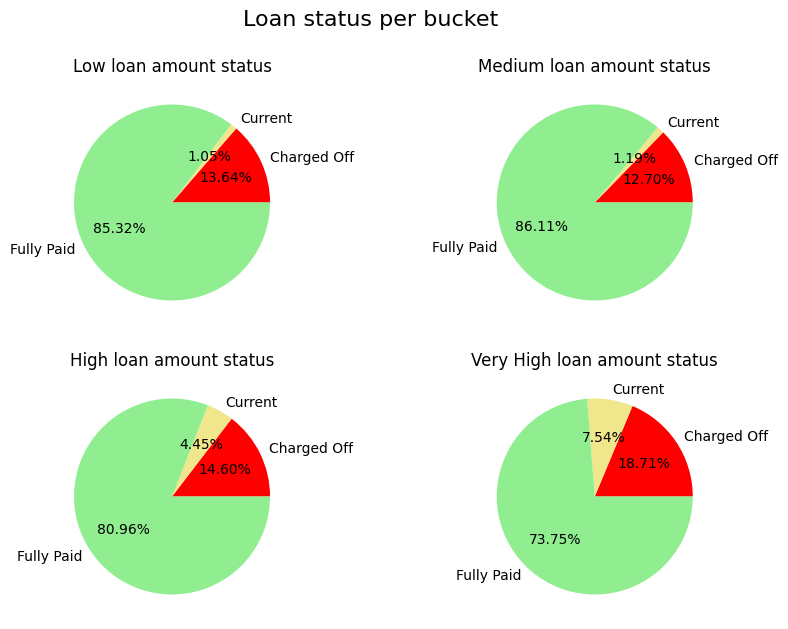

In [37]:
df_loanStats_cat = df_dropped[['loan_status', 'category_%ile']]
status = ['Charged Off', 'Current', 'Fully Paid']
df_loanStats_catL = df_loanStats_cat[df_loanStats_cat['category_%ile'] == 'L']
test = df_loanStats_catL.groupby(by='loan_status').size()
L_cat_values = test.values
df_loanStats_catM = df_loanStats_cat[df_loanStats_cat['category_%ile'] == 'M']
test = df_loanStats_catM.groupby(by='loan_status').size()
M_cat_values = test.values
df_loanStats_catH = df_loanStats_cat[df_loanStats_cat['category_%ile'] == 'H']
test = df_loanStats_catH.groupby(by='loan_status').size()
H_cat_values = test.values
df_loanStats_catHH = df_loanStats_cat[df_loanStats_cat['category_%ile'] == 'HH']
test = df_loanStats_catHH.groupby(by='loan_status').size()
HH_cat_values = test.values

fig, ax = plt.subplots(ncols = 2 , nrows = 2, sharex = False, sharey = False, figsize=(10,7))
fig.suptitle("Loan status per bucket", fontsize=16)
ax[0][0].pie(x=L_cat_values, labels=status, colors=['red', 'khaki', 'lightgreen'],
        autopct='%1.2f%%')
ax[0][0].set_title("Low loan amount status")
ax[0][1].pie(x=M_cat_values, labels=status, colors=['red', 'khaki', 'lightgreen'],
        autopct='%1.2f%%')
ax[0][1].set_title("Medium loan amount status")
ax[1][0].pie(x=H_cat_values, labels=status, colors=['red', 'khaki', 'lightgreen'],
        autopct='%1.2f%%')
ax[1][0].set_title("High loan amount status")
ax[1][1].pie(x=HH_cat_values, labels=status, colors=['red', 'khaki', 'lightgreen'],
        autopct='%1.2f%%')
ax[1][1].set_title("Very High loan amount status")

#### b) Account size based analysis

Mean is :  68968.92637711811
Standard deviation is : 63793.765790046426
Median is : 59000.0
Percentile :  [ 40404.    59000.    82300.   116000.   142000.   234999.36]
6000000.0


Text(0.5, 1.0, 'Loan status across income buckets')

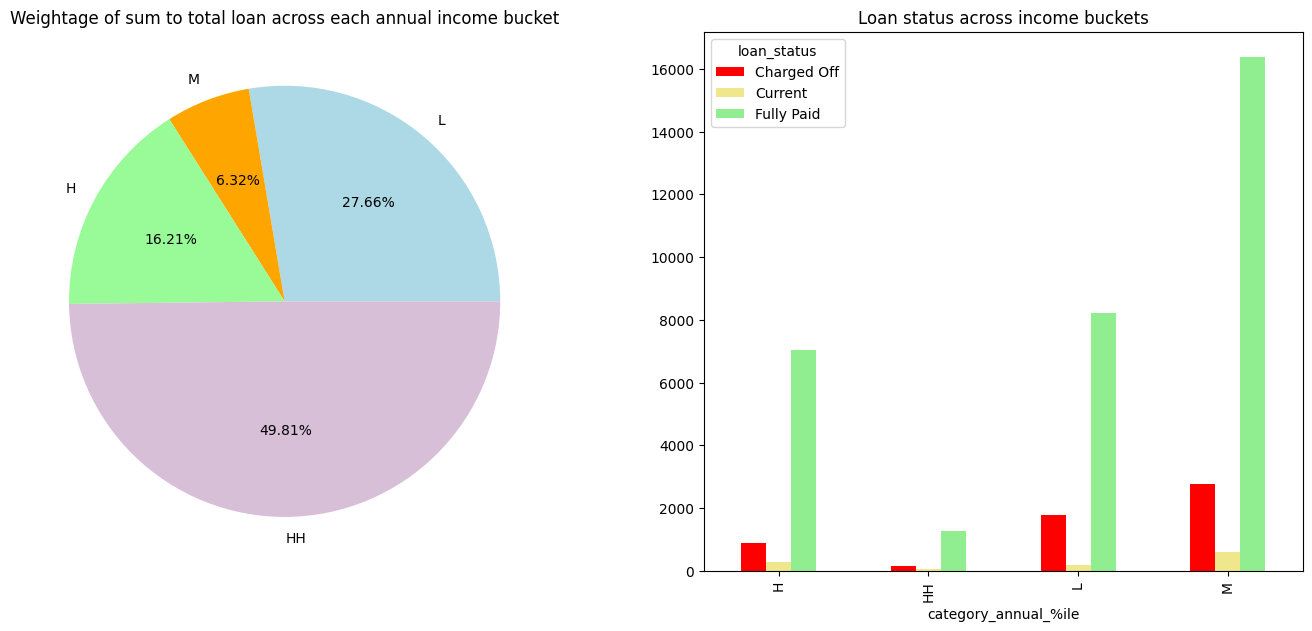

In [38]:
print("Mean is : ",df_dropped['annual_inc'].mean())
print("Standard deviation is :",df_dropped['annual_inc'].std())
print("Median is :", df_dropped['annual_inc'].median())
percentile = np.percentile(df_dropped['annual_inc'],[25,50,75,90,95,99])
print("Percentile : ",percentile)
print(np.max(df_dropped['annual_inc']))
df_dropped.loc[df_dropped['annual_inc'].between(0, 41000, 'both'), 'category_annual_%ile'] = 'L'
df_dropped.loc[df_dropped['annual_inc'].between(41000, 83000, 'right'), 'category_annual_%ile'] = 'M'
df_dropped.loc[df_dropped['annual_inc'].between(83000, 150000, 'right'), 'category_annual_%ile'] = 'H'
df_dropped.loc[df['annual_inc'].between(150000, 600000, 'right'), 'category_annual_%ile'] = 'HH'

df_loanStats = df_dropped[['loan_amnt','annual_inc', 'category_annual_%ile']]
df_loanStats.groupby(by='category_annual_%ile').sum()
palette_color = sns.color_palette('pastel')

categories = df_dropped['category_annual_%ile'].unique()
category_sum_values = df_loanStats.groupby(by='category_annual_%ile').sum()
arr = category_sum_values['loan_amnt'].values
categories = [x for x in categories if not pd.isna(x)]

fig,ax = plt.subplots(ncols = 2, nrows =1 , figsize=(17,7))

ax[0].pie(x=arr, labels=categories, colors=['lightblue','orange','palegreen','thistle'],
        autopct='%1.2f%%')
ax[0].set_title('Weightage of sum to total loan across each annual income bucket')

df_dropped.groupby(by=['category_annual_%ile','loan_status']).size().unstack().plot(kind='bar',color = ['red', 'khaki', 'lightgreen'], ax = ax[1])
ax[1].set_title("Loan status across income buckets")


Text(0.5, 1.0, 'Very High account size status')

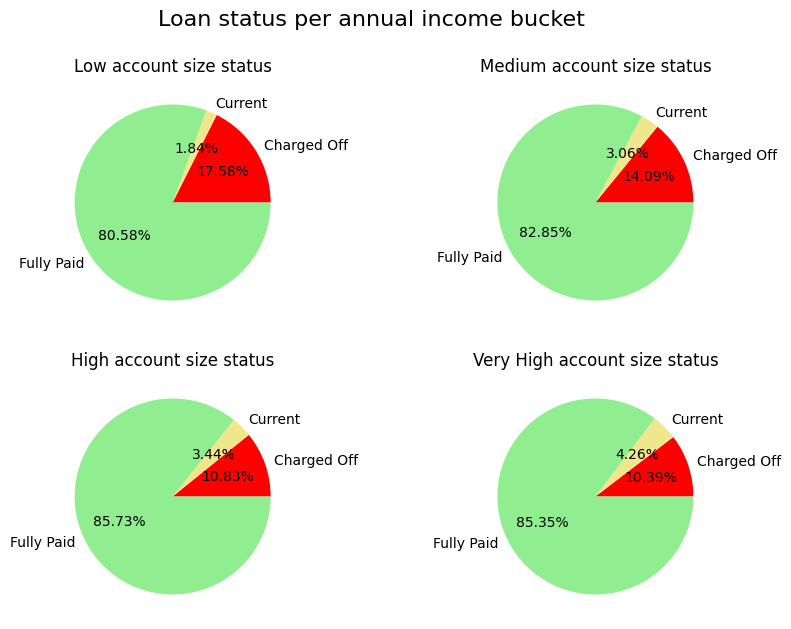

In [39]:
df_loanStats_cat = df_dropped[['loan_status', 'category_annual_%ile']]
status = ['Charged Off', 'Current', 'Fully Paid']
df_loanStats_catL = df_loanStats_cat[df_loanStats_cat['category_annual_%ile'] == 'L']
test = df_loanStats_catL.groupby(by='loan_status').size()
L_cat_values = test.values
df_loanStats_catM = df_loanStats_cat[df_loanStats_cat['category_annual_%ile'] == 'M']
test = df_loanStats_catM.groupby(by='loan_status').size()
M_cat_values = test.values
df_loanStats_catH = df_loanStats_cat[df_loanStats_cat['category_annual_%ile'] == 'H']
test = df_loanStats_catH.groupby(by='loan_status').size()
H_cat_values = test.values
df_loanStats_catHH = df_loanStats_cat[df_loanStats_cat['category_annual_%ile'] == 'HH']
test = df_loanStats_catHH.groupby(by='loan_status').size()
HH_cat_values = test.values

fig, ax = plt.subplots(ncols = 2 , nrows = 2, sharex = False, sharey = False, figsize=(10,7))
fig.suptitle("Loan status per annual income bucket", fontsize=16)
ax[0][0].pie(x=L_cat_values, labels=status, colors=['red', 'khaki', 'lightgreen'],
        autopct='%1.2f%%')
ax[0][0].set_title("Low account size status")
ax[0][1].pie(x=M_cat_values, labels=status, colors=['red', 'khaki', 'lightgreen'],
        autopct='%1.2f%%')
ax[0][1].set_title("Medium account size status")
ax[1][0].pie(x=H_cat_values, labels=status, colors=['red', 'khaki', 'lightgreen'],
        autopct='%1.2f%%')
ax[1][0].set_title("High account size status")
ax[1][1].pie(x=HH_cat_values, labels=status, colors=['red', 'khaki', 'lightgreen'],
        autopct='%1.2f%%')
ax[1][1].set_title("Very High account size status")

#### c) Loan deafults across buckets of ratio of Installment to Annual income


Mean is :  0.5483420242389992
Standard deviation is : 0.3332017309523654
Median is : 0.48337499999999994
Percentile :  [0.29373418 0.483375   0.73671111 1.01596967 1.19144    1.535207  ]
2.66885
[147293575   8523175  60267325 229518575]
['H', 'M', 'L', 'HH']


Text(0.5, 1.0, 'Loan status ratio of installment to annual income buckets')

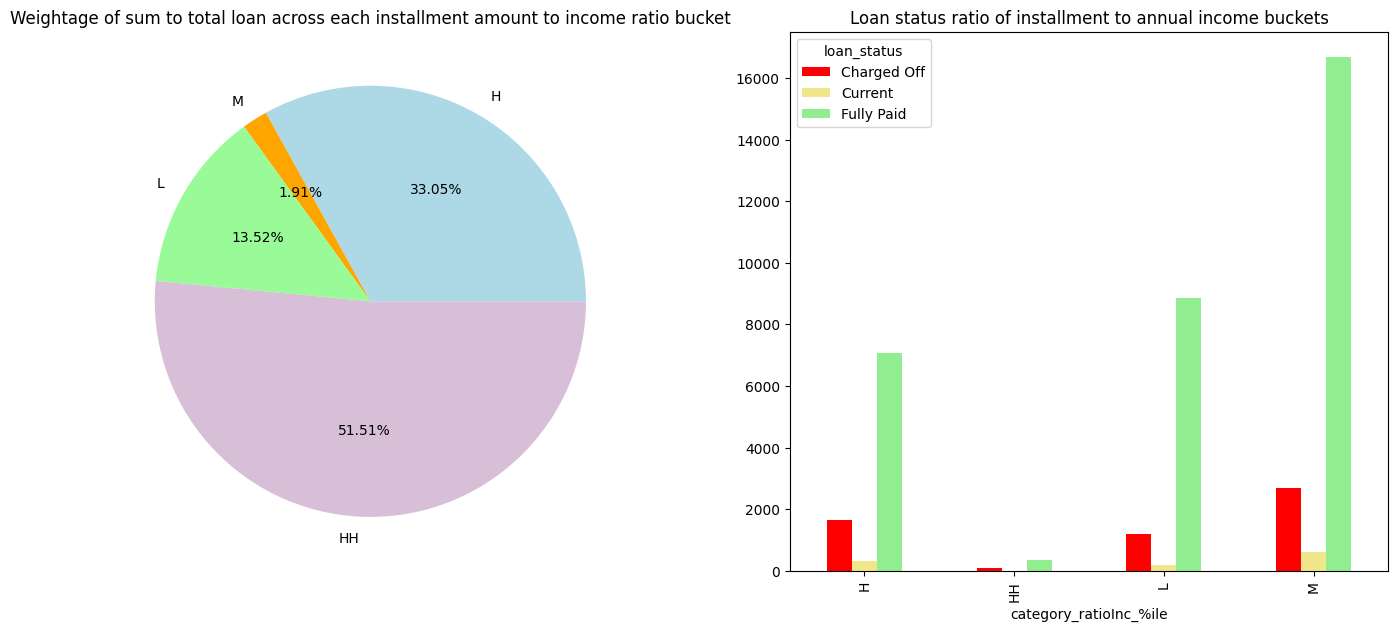

In [40]:
annual_inc = df_dropped['annual_inc']
loan_amt = df_dropped['loan_amnt']
installment = df_dropped['installment']

ratio_to_inc = (installment/annual_inc)*100
df_dropped['ratio_to_inc'] = ratio_to_inc
ratio_to_loan =(installment/loan_amt)*100
df_dropped['ratio_to_loan'] = ratio_to_loan

print("Mean is : ",df_dropped['ratio_to_inc'].mean())
print("Standard deviation is :",df_dropped['ratio_to_inc'].std())
print("Median is :", df_dropped['ratio_to_inc'].median())
percentile = np.percentile(df_dropped['ratio_to_inc'],[25,50,75,90,95,99])
print("Percentile : ",percentile)
print(np.max(df_dropped['ratio_to_inc']))

df_dropped.loc[df_dropped['ratio_to_inc'].between(0, 0.3, 'both'), 'category_ratioInc_%ile'] = 'L'
df_dropped.loc[df_dropped['ratio_to_inc'].between(0.3, 0.75, 'right'), 'category_ratioInc_%ile'] = 'M'
df_dropped.loc[df_dropped['ratio_to_inc'].between(0.75, 1.5, 'right'), 'category_ratioInc_%ile'] = 'H'
df_dropped.loc[df_dropped['ratio_to_inc'].between(1.5, 2.7, 'right'), 'category_ratioInc_%ile'] = 'HH'

df_loanStats = df_dropped[['loan_amnt','annual_inc', 'category_ratioInc_%ile']]
df_loanStats.groupby(by='category_ratioInc_%ile').sum()
palette_color = sns.color_palette('pastel')

categories = df_dropped['category_ratioInc_%ile'].unique()
category_sum_values = df_loanStats.groupby(by='category_ratioInc_%ile').sum()
arr = category_sum_values['loan_amnt'].values
categories=['H','M','L','HH']
print(arr)
print(categories)

fig,ax = plt.subplots(ncols = 2, nrows =1 , figsize=(17,7))

ax[0].pie(x=arr, labels=categories, colors=['lightblue','orange','palegreen','thistle'],
        autopct='%1.2f%%')
ax[0].set_title('Weightage of sum to total loan across each installment amount to income ratio bucket')

df_dropped.groupby(by=['category_ratioInc_%ile','loan_status']).size().unstack().plot(kind='bar',color = ['red', 'khaki', 'lightgreen'], ax = ax[1])
ax[1].set_title("Loan status ratio of installment to annual income buckets")

#### d) Loan deafults across buckets of ratio of Installment to Loan amount


Mean is :  2.996245532375205
Standard deviation is : 0.49410149479145943
Median is : 3.1753636363636364
Percentile :  [2.5826     3.17536364 3.34665    3.45294118 3.51378913 3.618828  ]
3.8824719101123595
[ 64915050   1509575 152788800 226389225]
['H', 'M', 'L', 'HH']


Text(0.5, 1.0, 'Loan status ratio of installment to annual income buckets')

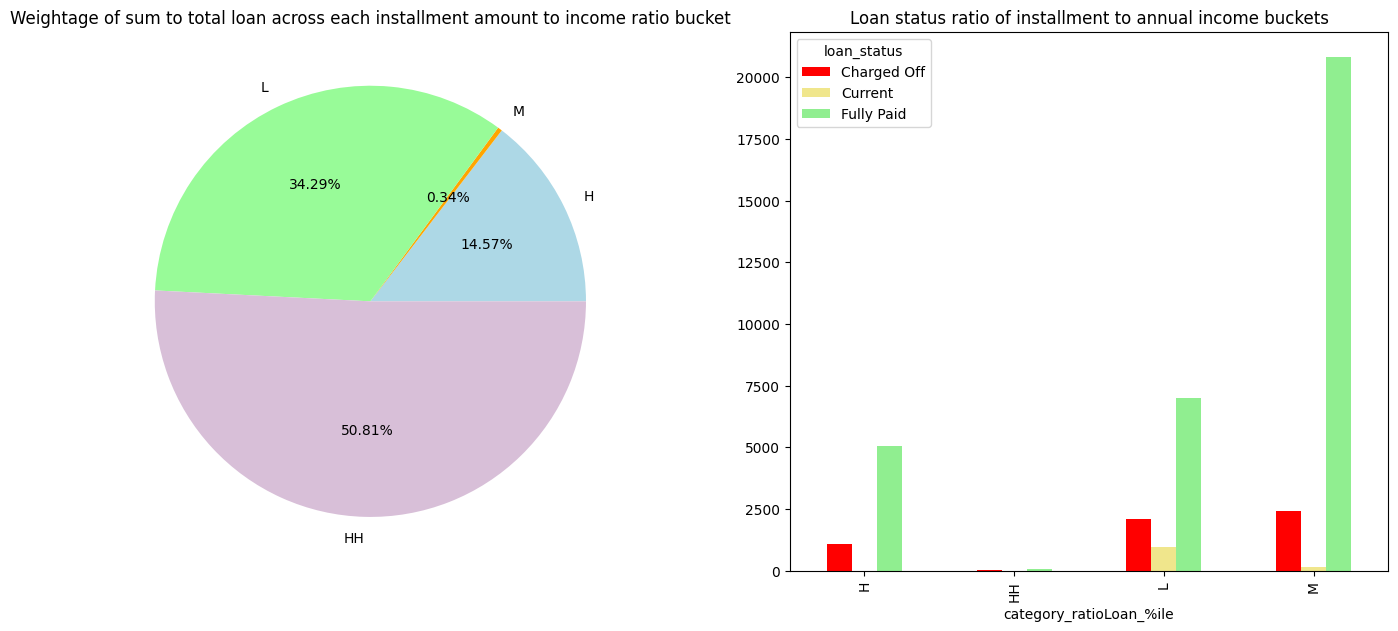

In [41]:
print("Mean is : ",df_dropped['ratio_to_loan'].mean())
print("Standard deviation is :",df_dropped['ratio_to_loan'].std())
print("Median is :", df_dropped['ratio_to_loan'].median())
percentile = np.percentile(df_dropped['ratio_to_loan'],[25,50,75,90,95,99])
print("Percentile : ",percentile)
print(np.max(df_dropped['ratio_to_loan']))

df_dropped.loc[df_dropped['ratio_to_loan'].between(0, 2.6, 'both'), 'category_ratioLoan_%ile'] = 'L'
df_dropped.loc[df_dropped['ratio_to_loan'].between(2.6, 3.4, 'right'), 'category_ratioLoan_%ile'] = 'M'
df_dropped.loc[df_dropped['ratio_to_loan'].between(3.4, 3.7, 'right'), 'category_ratioLoan_%ile'] = 'H'
df_dropped.loc[df_dropped['ratio_to_loan'].between(3.7, 3.9, 'right'), 'category_ratioLoan_%ile'] = 'HH'

df_loanStats = df_dropped[['loan_amnt','annual_inc', 'category_ratioLoan_%ile']]
df_loanStats.groupby(by='category_ratioLoan_%ile').sum()
palette_color = sns.color_palette('pastel')

category_sum_values = df_loanStats.groupby(by='category_ratioLoan_%ile').sum()
arr = category_sum_values['loan_amnt'].values
print(arr)
categories=['H','M','L','HH']
print(categories)

fig,ax = plt.subplots(ncols = 2, nrows =1 , figsize=(17,7))

ax[0].pie(x=arr, labels=categories, colors=['lightblue','orange','palegreen','thistle'],
        autopct='%1.2f%%')
ax[0].set_title('Weightage of sum to total loan across each installment amount to income ratio bucket')

df_dropped.groupby(by=['category_ratioLoan_%ile','loan_status']).size().unstack().plot(kind='bar',color = ['red', 'khaki', 'lightgreen'], ax = ax[1])
ax[1].set_title("Loan status ratio of installment to annual income buckets")

#### e) Loan deafults across buckets of dti


Mean is :  13.315129541506153
Standard deviation is : 6.678593594802346
Median is : 13.4
Percentile :  [ 8.17 13.4  18.6  22.33 23.84 26.68]
29.99
[109853550   4035700 102235700 229477700]
['H', 'M', 'L', 'HH']


Text(0.5, 1.0, 'Loan status per bucket of DTI ')

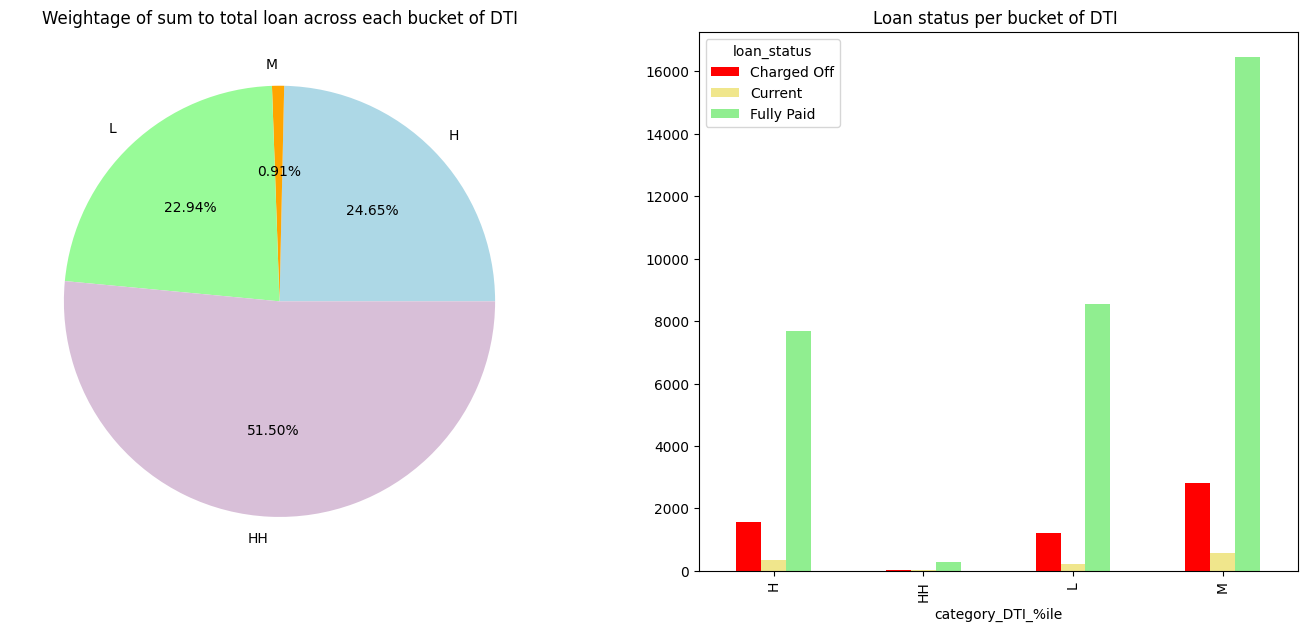

In [42]:
print("Mean is : ",df_dropped['dti'].mean())
print("Standard deviation is :",df_dropped['dti'].std())
print("Median is :", df_dropped['dti'].median())
percentile = np.percentile(df_dropped['dti'],[25,50,75,90,95,99])
print("Percentile : ",percentile)
print(np.max(df_dropped['dti']))

df_dropped.loc[df_dropped['dti'].between(0, 8.2, 'both'), 'category_DTI_%ile'] = 'L'
df_dropped.loc[df_dropped['dti'].between(8.2, 18.6, 'right'), 'category_DTI_%ile'] = 'M'
df_dropped.loc[df_dropped['dti'].between(18.6, 27, 'right'), 'category_DTI_%ile'] = 'H'
df_dropped.loc[df_dropped['dti'].between(27, 30, 'right'), 'category_DTI_%ile'] = 'HH'

df_loanStats = df_dropped[['loan_amnt','annual_inc', 'category_DTI_%ile']]
df_loanStats.groupby(by='category_DTI_%ile').sum()
palette_color = sns.color_palette('pastel')

category_sum_values = df_loanStats.groupby(by='category_DTI_%ile').sum()
arr = category_sum_values['loan_amnt'].values
print(arr)
categories=['H','M','L','HH']
print(categories)

fig,ax = plt.subplots(ncols = 2, nrows =1 , figsize=(17,7))

ax[0].pie(x=arr, labels=categories, colors=['lightblue','orange','palegreen','thistle'],
        autopct='%1.2f%%')
ax[0].set_title('Weightage of sum to total loan across each bucket of DTI')

df_dropped.groupby(by=['category_DTI_%ile','loan_status']).size().unstack().plot(kind='bar',color = ['red', 'khaki', 'lightgreen'], ax = ax[1])
ax[1].set_title("Loan status per bucket of DTI ")

#### g) Loan deafults across buckets number of open accounts





Mean is :  9.294407936148248
Standard deviation is : 4.400282473841606
Median is : 9.0
Percentile :  [ 6.  9. 12. 15. 17. 22.]
44
[101289700   4744450 106348150 233220350]
['H', 'M', 'L', 'HH']


Text(0.5, 1.0, 'Loan status per bucket of open_acc ')

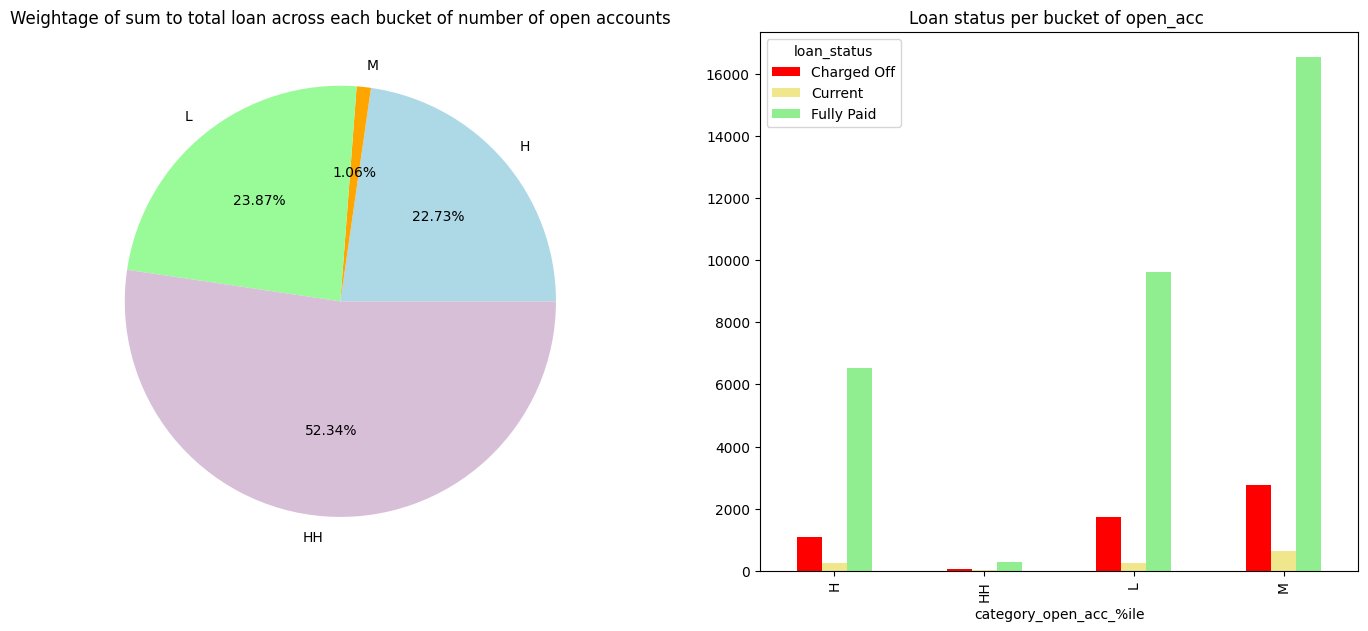

In [43]:
print("Mean is : ",df_dropped['open_acc'].mean())
print("Standard deviation is :",df_dropped['open_acc'].std())
print("Median is :", df_dropped['open_acc'].median())
percentile = np.percentile(df_dropped['open_acc'],[25,50,75,90,95,99])
print("Percentile : ",percentile)
print(np.max(df_dropped['open_acc']))

df_dropped.loc[df_dropped['open_acc'].between(0, 6, 'both'), 'category_open_acc_%ile'] = 'L'
df_dropped.loc[df_dropped['open_acc'].between(6, 12, 'right'), 'category_open_acc_%ile'] = 'M'
df_dropped.loc[df_dropped['open_acc'].between(12, 22, 'right'), 'category_open_acc_%ile'] = 'H'
df_dropped.loc[df_dropped['open_acc'].between(22, 44, 'right'), 'category_open_acc_%ile'] = 'HH'

df_loanStats = df_dropped[['loan_amnt','annual_inc', 'category_open_acc_%ile']]
df_loanStats.groupby(by='category_open_acc_%ile').sum()
palette_color = sns.color_palette('pastel')

category_sum_values = df_loanStats.groupby(by='category_open_acc_%ile').sum()
arr = category_sum_values['loan_amnt'].values
print(arr)
categories=['H','M','L','HH']
print(categories)

fig,ax = plt.subplots(ncols = 2, nrows =1 , figsize=(17,7))

ax[0].pie(x=arr, labels=categories, colors=['lightblue','orange','palegreen','thistle'],
        autopct='%1.2f%%')
ax[0].set_title('Weightage of sum to total loan across each bucket of number of open accounts')

df_dropped.groupby(by=['category_open_acc_%ile','loan_status']).size().unstack().plot(kind='bar',color = ['red', 'khaki', 'lightgreen'], ax = ax[1])
ax[1].set_title("Loan status per bucket of open_acc ")

#### g) Loan deafults across buckets number of total open accounts

Mean is :  22.08882846136415
Standard deviation is : 11.40170855315193
Median is : 20.0
Percentile :  [13. 20. 29. 38. 43. 56.]
90
[ 44959900   4935450 190688700 205018600]
['H', 'M', 'L', 'HH']


Text(0.5, 1.0, 'Loan status per bucket of total_acc ')

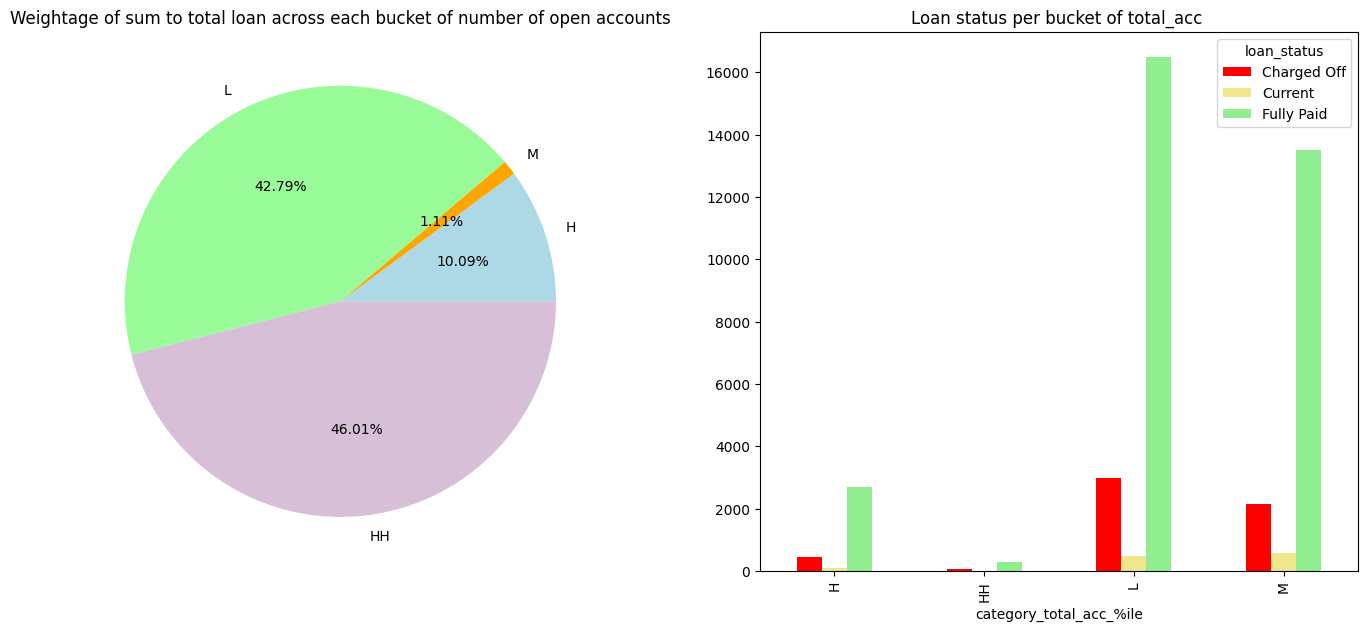

In [44]:
print("Mean is : ",df_dropped['total_acc'].mean())
print("Standard deviation is :",df_dropped['total_acc'].std())
print("Median is :", df_dropped['total_acc'].median())
percentile = np.percentile(df_dropped['total_acc'],[25,50,75,90,95,99])
print("Percentile : ",percentile)
print(np.max(df_dropped['total_acc']))

df_dropped.loc[df_dropped['total_acc'].between(0, 20, 'both'), 'category_total_acc_%ile'] = 'L'
df_dropped.loc[df_dropped['total_acc'].between(20, 38, 'right'), 'category_total_acc_%ile'] = 'M'
df_dropped.loc[df_dropped['total_acc'].between(38, 56, 'right'), 'category_total_acc_%ile'] = 'H'
df_dropped.loc[df_dropped['total_acc'].between(56, 90, 'right'), 'category_total_acc_%ile'] = 'HH'

df_loanStats = df_dropped[['loan_amnt','annual_inc', 'category_total_acc_%ile']]
df_loanStats.groupby(by='category_total_acc_%ile').sum()
palette_color = sns.color_palette('pastel')

category_sum_values = df_loanStats.groupby(by='category_total_acc_%ile').sum()
arr = category_sum_values['loan_amnt'].values
print(arr)
categories=['H','M','L','HH']
print(categories)

fig,ax = plt.subplots(ncols = 2, nrows =1 , figsize=(17,7))

ax[0].pie(x=arr, labels=categories, colors=['lightblue','orange','palegreen','thistle'],
        autopct='%1.2f%%')
ax[0].set_title('Weightage of sum to total loan across each bucket of number of open accounts')

df_dropped.groupby(by=['category_total_acc_%ile','loan_status']).size().unstack().plot(kind='bar',color = ['red', 'khaki', 'lightgreen'], ax = ax[1])
ax[1].set_title("Loan status per bucket of total_acc ")